<div style="background-color: #c1f2a5">


# PS6

In this problem set, we are going to implement the perceptron algorithm on a very simple feature space: pixels in images of handwritten digits.
    
# Instructions

Remember to do your problem set in Python 3. Fill in `#YOUR CODE HERE`.

Make sure: 
- that all plots are scaled in such a way that you can see what is going on (while still respecting any specific plotting instructions). 
- that the general patterns are fairly represented.
- to label all x- and y-axes unless otherwise instructed, and to include a title.
    
</div>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

## Import images for classification

In this assignment, we will train a perceptron to classify images of handwritten numbers 0-9. 

To facilitate training our perceptron, we have provided a function to read image files (load_image_files) of a given digit (n), from a provided path (path=...), convert them to a numpy matrix, and finally flatten that numpy matrix into a vector. The function load_image_files returns all of the vectors corresponding to pixels in handwritten digits of n from the MNIST dataset. This function returns “images” of 28x28=784 zeroes and ones, corresponding to whether the image was white or black at a given location. 

Note that for convenience for the assignment, each “image” returned to you is a single vector of length 784.

Functions that might be useful throughout this assignment (please read the documentation):

- `x.flatten()` (take a N-dimensional numpy array and make it one-dimensional)
- `np.random.choice` -- choose from the list of images
- `np.dot()` -- compute the dot product of two vectors: the sum of the product of the coordinates.
- `np.reshape()` -- reshapes a vector to a matrix
- `x.imshow()` -- visualize a matrix as an image

Run the following cell to load the first two sets of images for this assignment. For this to work, make sure your 'images' folder is in the same directory that your Jupyter notebook is saved in (NOTE: If you are using JupyterHub, this will automatically work).

In [2]:
DIM = (28,28) #these are the dimensions of the image

def load_image_files(n, path="images/"):
    # helper file to help load the images
    # returns a list of numpy vectors
    images = []
    for f in sorted(os.listdir(os.path.join(path,str(n)))): # read files in the path
        p = os.path.join(path,str(n),f)
        if os.path.isfile(p):
            i = np.loadtxt(p)
            assert i.shape == DIM # just check the dimensions here
            # i is loaded as a matrix, but we are going to flatten it into a single vector
            images.append(i.flatten())
    return images
            

# Load up these image files
A = load_image_files(1)
B = load_image_files(2)

N = len(A[0]) # the total size
assert N == DIM[0]*DIM[1] # just check our sizes to be sure

# set up some random initial weights
weights = np.random.normal(0,1,size=N)

In [6]:
# Load up these image files
A = load_image_files(0)
B = load_image_files(1)

N = len(A[0]) # the total size of input features
assert N == DIM[0]*DIM[1] # just check our sizes to be sure


## Q1. Visualize the images [SOLO, 5 pts]

Let's explore what we have loaded so far by examining the type and length of A (images of the handwritten number '0') and B (images of the handwritten number '1').

In [7]:
print('The data type of A is:',type(A))
print('\nThe number of images in A is: ', len(A))
print('\nEach image in A is of the form: ', type(A[0]), ' with length: ', len(A[0]))
print('\nThe number of images in B is: ',len(B))

The data type of A is: <class 'list'>

The number of images in A is:  5923

Each image in A is of the form:  <class 'numpy.ndarray'>  with length:  784

The number of images in B is:  6742


For Q1, visualize three randomly chosen examples of the "1" images, and three randomly chosen examples of the "0" images in a figure with subplots in 2 rows and 3 columns. Make sure to indicate in each subplot title which number is being shown. 

You will need to use the np.reshape function to put each image back into a square file. Check one of the previous problem sets on how to visualize an array as an image! 

Remove x and y tickmarks for every subplot. Since these are images, do not label your x- and y-axes. You should include titles on each subplot indicating which numbers are shown, and one overall figure title.

Save the total figure (all subplots in one figure) image as a png (refer to previous assignments, or right click and select 'Save As' in Jupyter)... and put the png in Gradescope.


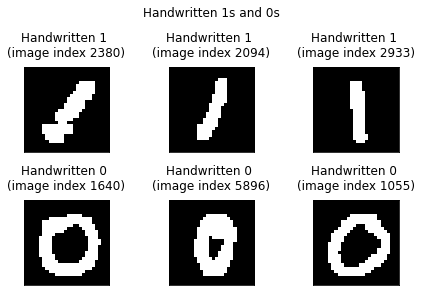

In [78]:
figure, axis = plt.subplots(2,3, constrained_layout=True)  # constrained_layout=True: avoid overlapping suptitle and subplot titles

#YOUR CODE HERE

figure.suptitle('Handwritten 1s and 0s')

for i in range(3):    # visualize 0s
    choice = np.random.choice(len(B))  # return index of the chosen image
    matrix = B[choice].reshape(28, 28)  # reshape
    axis[0, i].matshow(matrix, cmap='gray')
    axis[0, i].set_xticks([])
    axis[0, i].set_yticks([])
    axis[0, i].set_title('Handwritten 1 \n(image index ' + str(choice) + ')')

for i in range(3):    # visualize 1s
    choice = np.random.choice(len(A))  # return index of the chosen image
    matrix = A[choice].reshape(28, 28)  # reshape
    axis[1, i].matshow(matrix, cmap='gray')
    axis[1, i].set_xticks([])
    axis[1, i].set_yticks([])
    axis[1, i].set_title('Handwritten 0 \n(image index ' + str(choice) + ')')


figure.savefig('PS6_Q1.png')

## Q2.1 Perceptron output [HELP, 5pts]

Write the compute_output function that takes 1) the weights W of the perceptron and 2) an image (as a vector of 784 features), and computes the perceptron's output.

As a reminder, to compute the perceptron's output, you should:
- compute $y = \sum_i w_i \times x_i$. Look-up np.dot to speed up your code.
- return $1$ if $y>0$, $0$ otherwise.

Test your function with the test case we provide, and try other test cases of your own.

When you are finished, copy and paste your function code into the designated spot on Gradescope (A). There will also be some printed output from a cell below the test case that you will be instructed to paste into Gradescope (B).



### A.  Copy and paste your function code into the designated spot on Gradescope:

In [37]:
def compute_output(W, image):
    """
    Computes the output of the current network with weight matrix W for one image.
    
    Parameters
    ----------
    W: the weight matrix (1,n)
    image:  a length n array of input features representing one image

    Returns
    -------
    the 1 or 0 output of the network

    """
    # YOUR CODE HERE
    y = np.dot(W, image)
    if y > 0:
        return 1
    return 0

In [38]:
# TEST YOUR FUNCTION ON YOUR OWN HERE
A = load_image_files(0)
B = load_image_files(1)
weights = (np.arange(len(A[0]))/(len(A[0])))-.5

Q2_test = np.empty(10)
for i in range(5):
    Q2_test[2*i] = compute_output(A[i],weights)
    Q2_test[2*i + 1] = compute_output(B[i],weights)
print(Q2_test)
# this should return [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]



[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### B. Copy and paste the printed output from the below cell into Q2 in Gradescope:

In [39]:
Q2_answers = np.empty(10)
weights = np.sin(np.arange(len(A[0])))
for i in range(5):
    Q2_answers[2*i] = compute_output(A[i],weights)
    Q2_answers[2*i + 1] = compute_output(B[i],weights)
    
print('Q2 answer')
print(Q2_answers)

Q2 answer
[1. 0. 1. 0. 1. 1. 1. 0. 0. 0.]


## Q3. Overall accuracy [SOLO, 5 points]
Write a function that computes the current accuracy of the network on a set of images.

Test your function with the provided test case on your own.
Then, you will report in Gradescope the output for 0 and 1 images for the perceptron defined by sin_weights, provided below. Copy and paste your function code (**A**) and the Q3 output (**B**) as specified in the Gradescope prompts!

### A. Copy and paste your function code into the designated spot on Gradescope:


In [42]:
def compute_accuracy(W,images,labels):
    """
    Computes the network accuracy on a list of images
    
    Parameters
    ----------
    W: the current weight matrix
    images:  list of length n array images for number
    labels: list of correct labels for images

    Returns
    -------
    Proportion of correct labels

    """
    num_correct = 0  # tracking the number of correct labels
    total = len(labels)
    for i in range(total):
        label_assigned = compute_output(W, images[i])
        num_correct += 1 if label_assigned == labels[i] else 0
    return num_correct/total

In [43]:
# TEST YOUR FUNCTION ON YOUR OWN
weights = (np.arange(len(A[0]))/(len(A[0])))-.5
accuracyA = compute_accuracy(weights,A,np.zeros(len(A)))
print('accuracy on "0" images is ',accuracyA)
accuracyB = compute_accuracy(weights,B,np.zeros(len(B)))
print('accuracy on "1" images is ',accuracyB)

# your answer should be
#accuracy on "0" images is  0.0595981765996961
#accuracy on "1" images is  0.10872144764164936

accuracy on "0" images is  0.0595981765996961
accuracy on "1" images is  0.10872144764164936


### B. Copy and paste the printed output from the below cell into Q3 in Gradescope:

In [44]:
# Q3 output
print('Q3_answer')

sin_weights = np.sin(np.arange(len(A[0])))
accuracyA = compute_accuracy(sin_weights,A,np.zeros(len(A)))
print('accuracy on "0" images is ',accuracyA)
accuracyB = compute_accuracy(sin_weights,B,np.zeros(len(B)))
print('accuracy on "1" images is ',accuracyB)

Q3_answer
accuracy on "0" images is  0.5043052507175417
accuracy on "1" images is  0.5103826757638683


## Q4. Updating the weights after one single training example [HELP, 5pts]

Write the function update_weights_single_image that updates the network's weights with one example: an image and its label (1 or 0) over one update cycle. 

Use the following learning algorithm for this perceptron.

Simplest perceptron algorithm:
1. Use the input W to compute $y = \sum_i w_i \times x_i$ and determine predicted label (1/0).   
   
2. If predicted and true label disagree:  
    --> If true label is “1”: W += x   
    --> If true label is "0": W -= x   
   If predicted and true label agree, do nothing.

See slide 22 of Lecture 12 on Simple Networks to refresh on this learning algorithm.


In [68]:
def update_weights_single_image(W,image,label):
    """
    Updates the weight matrix W after one training (image,label) pair.
    
    
    Parameters
    ----------
    W: the current weight matrix
    image:  a length n array of input features representing one image
    label: a single number indicating whether the image is a 0 or a 1

    Returns
    -------
    the new perceptron weight matrix (same size as W)

    """
    
    # YOUR CODE HERE
    predicted = compute_output(W, image)
    if predicted != label:
        if label == 1:
            W += image
        if label == 0:
            W -= image
#     return W

**Next:** 

Start with 0 weights, and train the perceptron on a single image, the first image of a "1". Visualize the trained weights the same way you visualized the images in Q1: reshaping them (28,28). Use the same label and format guidelines as for Q1. 

Your image should have a clear pattern. Upload it to Gradescope, and explain the pattern you see.


### Upload your image to Gradescope:

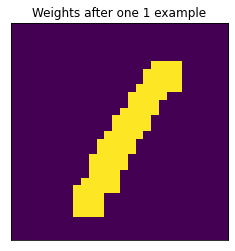

In [69]:
weights = np.zeros(len(B[0]))
# YOUR CODE HERE
update_weights_single_image(weights,B[0],1)


figure, axis = plt.subplots()
im = axis.imshow(np.reshape(weights, [28,28]))


axis.set_xticks([])
axis.set_yticks([])


# set the title
axis.set_title('Weights after one 1 example');
figure.savefig('PS6_Q4.png')

## Q5. Train with multiple images [SOLO, 5 points]

Write the function update_weights_multiple_images that takes starting network weights, the images and their labels, and applies the previous training to all images in order.

This function should use your previous function that updated weights based on a single image. Copy your function into gradescope.

In [70]:
def update_weights_multiple_images(W,images,labels):
    """
    Updates the weight matrix W with multiple training (image,label) pairs.
    
    Parameters
    ----------
    W: the current weight matrix
    images: list of images (each image a length n array)
    labels: list of labels (1 or 0)

    Returns
    -------
    the new perceptron weight matrix (same size as W)

    """
    
    # YOUR CODE HERE
    for i in range(len(images)):
        update_weights_single_image(W,images[i],labels[i])
    return W

## Q6. Train your perceptron! [SOLO, 5 pts]

We'll train the preceptron in small batches. We first initialize the weights from a random normal distribution. We'll select N_samples images of "0"s and N_samples images of "1"s randomly, then train the weights on this small batch. We'll then iterate this for as many steps as needed.

We're providing the train_perceptron function (read and make sure to check that you understand the function).


In [71]:
def train_perceptron(train_0, train_1,N_samples = 5, steps = 200):
    performance = np.empty(steps)
    train_labels = np.ones(2*N_samples)
    train_labels[0:N_samples] = np.zeros(N_samples)
    
    full_sample = train_0+train_1
    full_labels = np.ones(len(full_sample))
    full_labels[0:len(train_0)]=np.zeros(len(train_0))

    # set up some random initial weights
    weights = np.random.normal(0,1,size=N)
    for i in range(steps):
        examples_0 = [train_0[j] for j in np.random.choice(np.arange(len(train_0)),size=N_samples,replace = False).tolist()]
        examples_1 = [train_1[j] for j in np.random.choice(np.arange(len(train_1)),size=N_samples,replace = False).tolist()]
        examples = examples_0+examples_1
        
        weights = update_weights_multiple_images(weights,examples,train_labels)
        performance[i] = compute_accuracy(weights,full_sample,full_labels)
        
    return performance, weights

### Train your perceptron:

Plot the performance (i.e., accuracy) as a function of time (i.e., step) for N_samples = 1, 5, and 25. Use 200 steps for each. Place the three subplots into one figure with subplots in 3 rows and 1 column, and an overall figure size of (8,12). 
- Set each y axis limit to (0.7,1.2).
- Make sure to indicate with titles which subplot reflects which number of training samples! Also make sure to add an overall figure title.
- Run this multiple times, and select the set of subplots  you find most representative to copy into Gradescope.

**A**. Copy and paste your image from the below cell into Q6 in Gradescope. 

**B**. How many steps should we run? Explain (in the Gradescope prompt) in a couple of sentences your heuristic.

**C**. Does your solution converge on 100% accuracy or not? What does this mean in terms of the linear separability of “0” and “1” on this feature space?


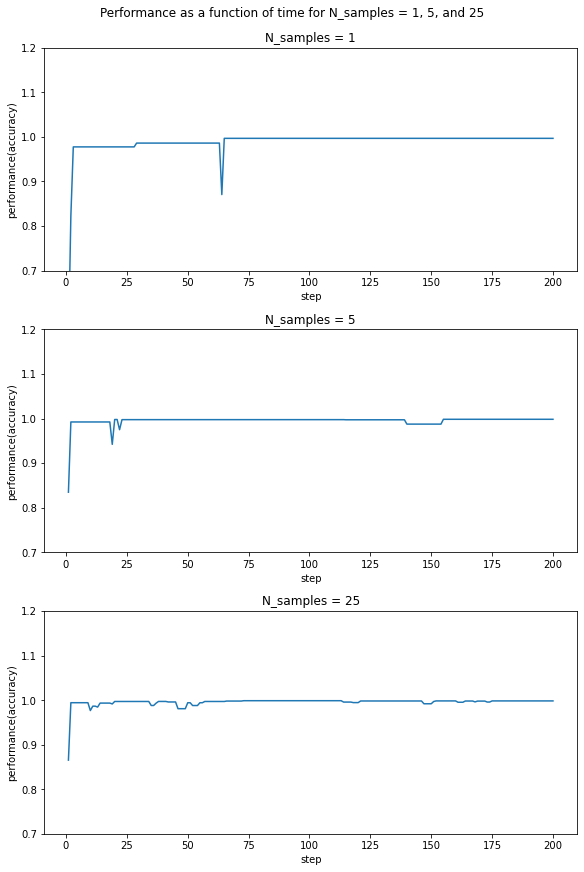

In [80]:
figure, (axis1, axis2, axis3) = plt.subplots(3,1, figsize=(8,12), constrained_layout=True) #YOUR CODE HERE

#YOUR CODE HERE

figure.suptitle('Performance as a function of time for N_samples = 1, 5, and 25')
step = np.arange(1, 201)

performance1, weights1 = train_perceptron(A, B, 1, 200)
axis1.plot(step, performance1)
axis1.set_ylim([0.7, 1.2])
axis1.set_xlabel("step")
axis1.set_ylabel("performance(accuracy)")
axis1.set_title("N_samples = 1")

performance5, weights5 = train_perceptron(A, B, 5, 200)
axis2.plot(step, performance5)
axis2.set_ylim([0.7, 1.2])
axis2.set_xlabel("step")
axis2.set_ylabel("performance(accuracy)")
axis2.set_title("N_samples = 5")

performance25, weights25 = train_perceptron(A, B, 25, 200)
axis3.plot(step, performance25)
axis3.set_ylim([0.7, 1.2])
axis3.set_xlabel("step")
axis3.set_ylabel("performance(accuracy)")
axis3.set_title("N_samples = 25")


figure.savefig('PS6_Q6.png')

## Q7. trained weights [SOLO 5pts]

Reshape your fitted weights (for the N_samples = 25, steps = 200 case) into the usual (28,28) shape and visualize them. Show a picture of this weight matrix. Add a color bar to your plot, as well as a title. 

**(A)** Copy the plot into Gradescope. 
   
**(B)** Interpret your plot using 1-3 sentences in the Gradescope prompt, addressing each of the following points to receive full credit: 

- What do large negative and large positive values mean, intuitively? 
- What do numbers near zero mean? 
- Why does this matrix look the way that it does, in terms of where large positive and negative terms are located?

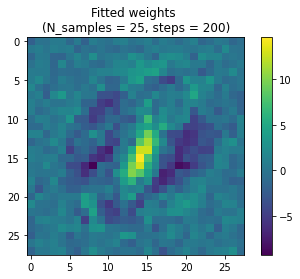

In [106]:
#YOUR CODE HERE


figure, axis = plt.subplots()
im = axis.imshow(np.reshape(weights25, [28,28]))
figure.colorbar(im)  # add colorbar


# axis.set_xticks([])
# axis.set_yticks([])


axis.set_title('Fitted weights \n(N_samples = 25, steps = 200)');


figure.savefig('PS6_Q7.png')

## Q8. Zeroing weights [5pts, HELP] 
What should you expect to happen if you set the elements of the weight vector which are close to zero to be actually zero? We will explore this by starting with the trained weights from the N_samples = 25, steps = 200 case (as calculated above in Q6).

Set the 7, 14, 21, ... 784 weight values closest to zero (in absolute value) to be actually 0, and calculate the accuracy in each case on classifications for “0” and “1” for 1000 randomly chosen samples of each. 

Create a plot with one line showing accuracy for "0" images vs. number of small values set to zero, and another line on the same plot showing accuracy for "1" images vs. number of small values set to zero.

Use a different color for each line, and make sure your plot shows a legend with labels, in addition to a title, and x- and y-axis labels. Set your y-axis limits to [0.5,1.1]. (You do not need to adjust the x-axis limits; they should automatically range from 0 to around 800).

**(A)**  Copy your plot into Gradescope.
  
  
**(B)**  What does this tell you about the proportion of the image which is diagnostic about “0” vs “1”? Enter your written response to this question at the Gradescope prompt.




### A.  Copy and paste your plot into Gradescope.

In [117]:
#Set the trained weights to use (if needed)

#YOUR CODE HERE


In [118]:
#Iterate through the various subsets of weights to zero out, and perform the accuracy calculations for the
#"0" and "1" examples on each iteration

#Hint: You may wish to work with a .copy() of your starting trained weights, just in case anything gets 
#accidentally overwritten while coding

#YOUR CODE HERE

w_abs = np.absolute(weights25)


examples_0 = [A[j] for j in np.random.choice(np.arange(len(A)),size=1000,replace = False).tolist()]
examples_1 = [B[j] for j in np.random.choice(np.arange(len(B)),size=1000,replace = False).tolist()]


num_zeros = np.arange(1, 112+1) * 7
accuracy0 = np.zeros(112)
accuracy1 = np.zeros(112)

for i in range(111):
    k = num_zeros[i]  # k: number of weight values to be set to zero
    w = weights25.copy()
    idx = np.argpartition(w_abs, k)
    w[idx[:k]] = 0  # set the first k numbers closest to zero to zero
    accuracy0[i] = compute_accuracy(w,examples_0,np.zeros(1000))
    accuracy1[i] = compute_accuracy(w,examples_1,np.ones(1000))


accuracy0[111] = compute_accuracy(np.zeros(784),examples_0,np.zeros(1000))
accuracy1[111] = compute_accuracy(np.zeros(784),examples_1,np.ones(1000))

accuracy1

array([1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 0.999, 0.999,
       0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
       0.999, 0.999, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 0.   ])

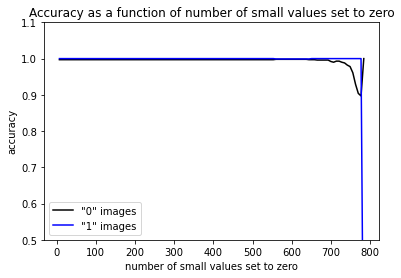

In [122]:
#Plot the results according to the instructions above

#YOUR CODE HERE

figure, axis = plt.subplots()


axis.plot(num_zeros, accuracy0, 'k', label = r'"0" images')
axis.plot(num_zeros, accuracy1, 'b', label = r'"1" images')


axis.set_xlabel("number of small values set to zero")
axis.set_ylabel("accuracy")
axis.set_ylim([0.5, 1.1])
axis.set_title('Accuracy as a function of number of small values set to zero')
plt.legend()


figure.savefig('PS6_Q8.png')

## Q9. Classifying multiple digits [5 pts, HELP]

Train a perceptron for each possible pair of digits using the default parameters (not just "0" vs. "1", but also "0" vs. "2", ..., "8" vs."9". 

Note that you can still use your previous "train_perceptron" function for any pair of digits. The classifier will internally refer to them as '0' or '1' as a binary indicator of group, but the effect of the training will be to distinguish whichever two numbers the perceptron is being trained on. 

Store the accuracy on the full data set for each pair of digits in a 10 by 10 matrix (the diagonal elements' value should be 1). Visualize the matrix as an image with colors indicating the accuracy. Add a colorbar, and ticks and labels indicating the digits. You should also label your x and y axis for this plot.

**(A)**  Upload your final plot to Gradescope.  
   
**(B)**  What does this plot tell you about which pairs of numbers may be harder to identify? Does this match your intuitions? Answer in 2-3 sentences in Gradescope.

Hint: this make take a while to run (depending on your code efficiency, it could take a few minutes to an hour). Start early, and when you develop your code, try it out with just digits until 3 or 4. When you think it's working, run it for all digits up to 9.


In [123]:
#YOUR CODE HERE

matrix = np.zeros(100).reshape(10, 10)

matrix


# figure.savefig('PS6_Q9.png')

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

<div style="background-color: #c1f2a5">

# Submission

When you're done with your problem set, do the following:
- Upload your answers in Gradescope's PS6.

- Convert your Jupyter Notebook into a `.py` file by doing the following:    
    
</div>


<center>    
  <img src="https://www.dropbox.com/s/7s189m4dsvu5j65/instruction.png?dl=1" width="300"/>
</center>

<div style="background-color: #c1f2a5">
    
- Submit the `.py` file you just created in Gradescope's PS6-code.
    
</div>        




</div>

</div>
